# import libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# loading dataset and Inspecting

In [61]:
data=pd.read_csv('C:/Users/Admin/Desktop/ds & da/python/car dekho/car data.csv')

In [33]:
data.shape

(301, 9)

In [34]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [36]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# checking for null values

In [37]:
data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# column comaprison

In [62]:
data['Age'] = 2024 - data['Year']

In [63]:
data.rename(columns = {'Selling_Price':'Selling_Price(lacs)','Present_Price':'Present_Price(lacs)','Owner':'Past_Owners'},inplace = True)

In [64]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price(lacs)', 'Present_Price(lacs)',
       'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Past_Owners',
       'Age'],
      dtype='object')

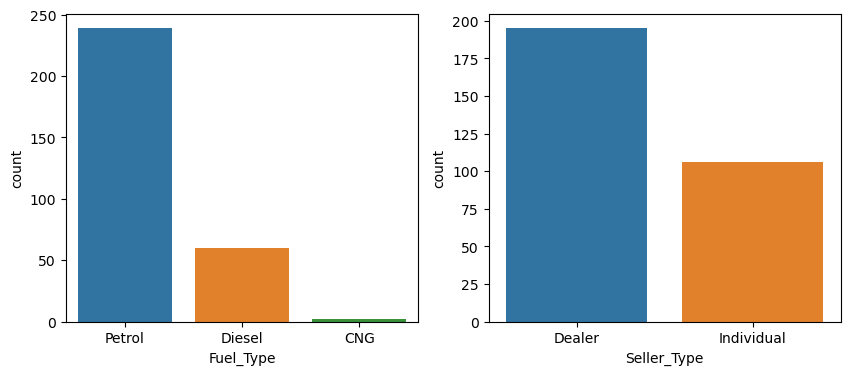

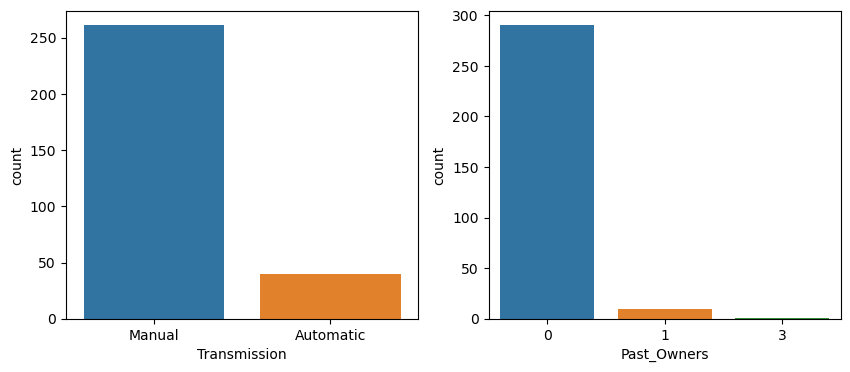

In [13]:
comp_cols = ['Fuel_Type','Seller_Type','Transmission','Past_Owners']
i=0
while i < 4:
    fig = plt.figure(figsize=[10,4])
    
    plt.subplot(1,2,1)
    sns.countplot(x=comp_cols[i], data=data)
    i += 1
    
    plt.subplot(1,2,2)
    sns.countplot(x=comp_cols[i], data=data)
    i += 1
    
    plt.show()

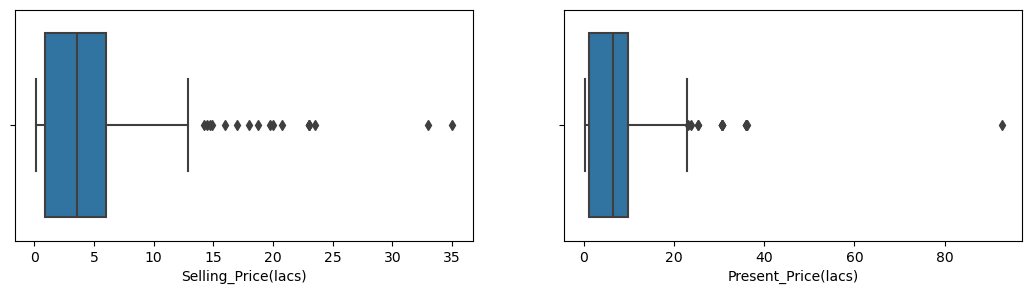

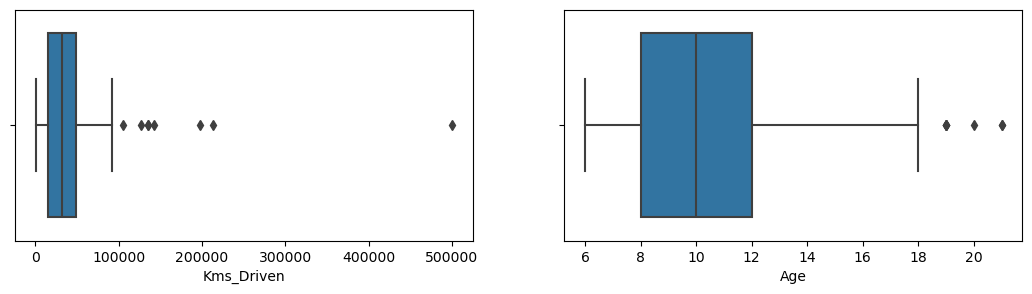

In [41]:
num_cols = ['Selling_Price(lacs)','Present_Price(lacs)','Kms_Driven','Age']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    
   
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=data)
    i += 1
    
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=data)
    i += 1
    
    plt.show()

In [65]:
cat_cols = ['Fuel_Type','Seller_Type','Transmission']
i=0
while i < 3:
    data[cat_cols[i]]= data[cat_cols[i]].astype('category')
    data[cat_cols[i]]= data[cat_cols[i]].cat.codes
    i+=1

In [66]:
data.head()

,Car_Name,Year,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
0,ritz,2014,3.35,5.59,27000,2,0,1,0,10
1,sx4,2013,4.75,9.54,43000,1,0,1,0,11
2,ciaz,2017,7.25,9.85,6900,2,0,1,0,7
3,wagon r,2011,2.85,4.15,5200,2,0,1,0,13
4,swift,2014,4.60,6.87,42450,1,0,1,0,10


In [67]:
y = data['Selling_Price(lacs)']
X = data.drop(['Selling_Price(lacs)','Year','Car_Name'],axis=1)

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [71]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [72]:
 lr.fit(X_train,y_train)

LinearRegression()

In [74]:
y_pred_train = lr.predict(X_train)

In [75]:
y_pred_train

array([ 2.34029323e+00,  1.03715977e+01,  6.01969762e+00, -1.10145733e+00,
        1.00157436e+00,  7.65355212e-02,  5.19371549e-01,  7.31530433e+00,
       -4.98526539e-02,  7.52507282e+00,  8.46288201e+00,  8.53724174e+00,
        8.97131273e-01,  1.32961948e+00,  1.84603421e+00,  2.13501527e+00,
        8.31113844e+00,  9.08300762e+00,  4.24329122e+00,  3.96633195e+00,
        1.90722955e+00,  1.01147856e+01,  1.02701853e+01,  1.72553282e+00,
        6.39978552e+00,  2.16051150e+00,  1.46156577e+00,  1.46925346e+00,
        6.34004418e+00,  4.46760103e+00,  5.67916430e+00,  3.13964564e+00,
        2.20216003e+00,  9.88500796e+00,  9.80484179e+00, -2.03872295e-01,
        1.60702477e+00,  4.57867044e-01,  8.17280005e-01,  1.63761719e+00,
        8.22305480e+00,  3.03990717e+00,  1.71731009e+01,  3.64331134e+00,
       -1.24855860e-01,  3.04444218e-01,  1.77043650e+00,  6.92944125e-01,
        1.01581249e+01,  4.29999925e+00,  7.73283976e+00,  5.18480671e+00,
       -1.64466215e+00,  

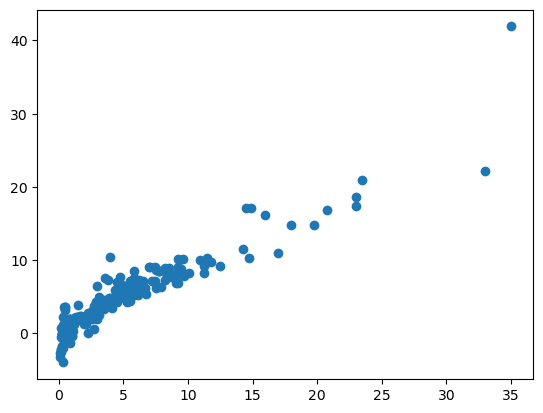

In [83]:
plt.scatter(y_train,y_pred_train)
plt.show()

In [77]:
from sklearn.metrics import r2_score

In [79]:
r2_score(y_train,y_pred_train)

0.8800594535535694

In [84]:
y_pred_test = lr.predict(X_test)

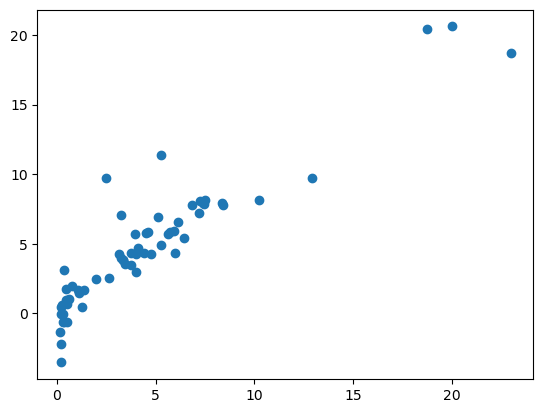

In [85]:
plt.scatter(y_test,y_pred_test)
plt.show()

In [86]:
r2_score(y_test,y_pred_test)

0.8484549412090379